### B.1

In [12]:
import numpy as np
import pandas
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
# C = len(data["species"].unique())

In [15]:
def convert_labels(y, C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y


In [5]:
# Process the data
y = iris.target
X = iris.data
X = np.concatenate((np.ones((1, X.shape[0])), X.T), axis = 0)
y = np.array(y)

In [6]:
# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X.T, y, test_size=0.2, random_state=14)
x_train = x_train.T
x_test = x_test.T

In [7]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [8]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = N
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W

            W.append(W_new)
    return W

In [9]:
# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

In [10]:
# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

# W[-1] is the solution, W is all history of weights

In [16]:
C = len(np.unique(y_train))

eta = 0.05
d = x_train.shape[0]
W_init = np.random.randn(x_train.shape[0], C)
W = softmax_regression(x_train, y_train, W_init, eta)
print(W[-1])

[[-0.06497664  3.1434934  -2.06803637]
 [ 3.33146844  1.9869425  -3.06400691]
 [ 3.19890585  0.30783576 -4.46111319]
 [-4.79919331 -0.33107446  7.35724215]
 [-3.31993537 -3.7253042   5.67751514]]


In [18]:
y_pred = pred(W[-1], x_test)
y_pred

array([0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0,
       0, 1, 0, 2, 0, 1, 2, 0])

## Using library Sklearn Logistic Regression

In [19]:
import matplotlib.pyplot as plt
import sklearn
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [20]:
# split the data into training and test sets
iris=load_iris()

X=iris.data 
Y=iris.target 

X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,
random_state=2)

In [21]:

lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)

# for training
lorg.fit(X_train,Y_train)

# for prediction
Y_pred=lorg.predict(X_test)

# for accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))
# for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(Y_pred)

0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### A.2

In [1]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [2]:
# Import dữ liệu IRIS
iris = datasets.load_iris()

X = iris.data[:, :4]  # Lấy cả 4 đặc trưng
Y = iris.target

# Chuẩn hóa dữ liệu
X_norm = (X - X.min())/(X.max() - X.min())

In [3]:
# Trực quan hóa dữ liệu bằng PCA
pca = sklearnPCA(n_components=2)  # PCA 2 chiều
transformed = pd.DataFrame(pca.fit_transform(X_norm))

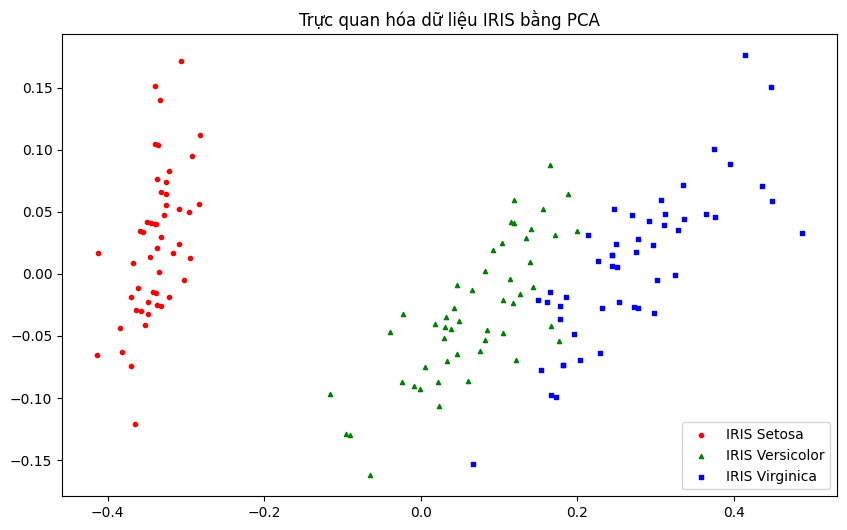

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa', c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor', c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica', c='blue', marker="s")
plt.legend()
plt.title("Trực quan hóa dữ liệu IRIS bằng PCA")
plt.savefig('iris_pca_visualization.png')
plt.show()

In [6]:
# Chia dữ liệu thành tập Train và Validation
# Mỗi loại hoa: 40 mẫu đầu cho Train, 10 mẫu sau cho Validation
X_train = np.vstack((X_norm[0:40], X_norm[50:90], X_norm[100:140]))
Y_train = np.hstack((Y[0:40], Y[50:90], Y[100:140]))

X_val = np.vstack((X_norm[40:50], X_norm[90:100], X_norm[140:150]))
Y_val = np.hstack((Y[40:50], Y[90:100], Y[140:150]))

In [7]:
# Áp dụng thuật toán K-NN
# Thử nghiệm với các giá trị k khác nhau
k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_val)
    accuracy = accuracy_score(Y_val, Y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"\nKết quả với k = {k}:")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Tính precision cho từng lớp và lấy trung bình
    precision = precision_score(Y_val, Y_pred, average='macro')
    print(f"Precision (macro): {precision:.4f}")
    
    # Ma trận nhầm lẫn
    cm = confusion_matrix(Y_val, Y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Báo cáo phân loại chi tiết
    print("\nBáo cáo phân loại:")
    print(classification_report(Y_val, Y_pred, target_names=iris.target_names))


Kết quả với k = 1:
Accuracy: 1.0000
Precision (macro): 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Báo cáo phân loại:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Kết quả với k = 3:
Accuracy: 1.0000
Precision (macro): 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Báo cáo phân loại:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg     

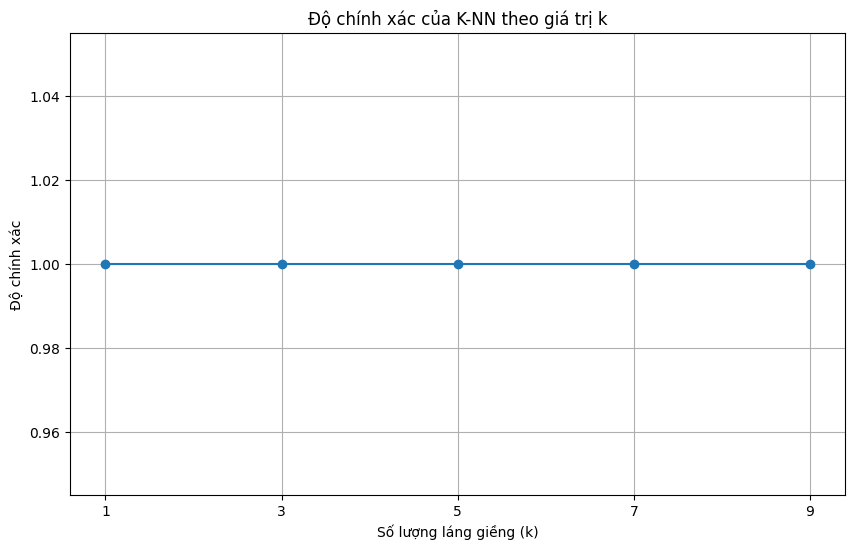

In [8]:
# Vẽ biểu đồ độ chính xác theo k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Độ chính xác của K-NN theo giá trị k')
plt.xlabel('Số lượng láng giềng (k)')
plt.ylabel('Độ chính xác')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('knn_accuracy_by_k.png')
plt.show()

In [9]:
# Chọn k tốt nhất
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nGiá trị k tốt nhất: {best_k} với độ chính xác: {max(accuracy_scores):.4f}")


Giá trị k tốt nhất: 1 với độ chính xác: 1.0000


In [10]:
# Áp dụng K-NN với k tốt nhất
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, Y_train)
Y_pred = best_knn.predict(X_val)

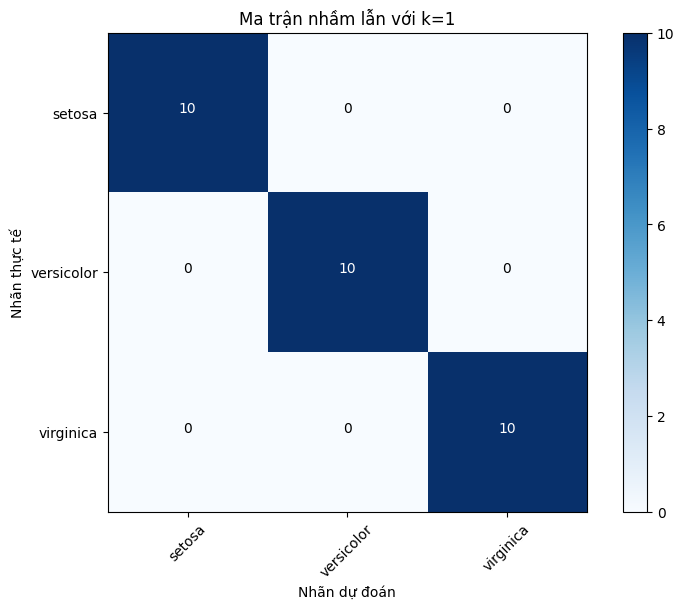

In [11]:
# Vẽ ma trận nhầm lẫn
cm = confusion_matrix(Y_val, Y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Ma trận nhầm lẫn với k={best_k}')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

# Thêm giá trị vào ô
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.savefig('confusion_matrix.png')
plt.show()

### B.3

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

n_samples = 20000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,

stratify=y, test_size=0.1)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"confusion_matrix: {confusion_matrix(y_test, y_pred)}")

accuracy_score: 0.8212201591511936
confusion_matrix: [[68  0  0  0  0  0  0  0  0  1  0  1  0  1  0  4  0  2  0  3]
 [ 0 79  3  1  0  5  2  0  0  0  0  1  1  1  1  1  0  1  0  1]
 [ 0  5 78  6  1  4  2  0  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  4  8 66  5  1  4  1  1  0  0  1  3  2  0  0  0  1  1  0]
 [ 0  3  2  8 74  1  2  0  0  0  0  0  3  0  0  1  1  1  0  0]
 [ 0  4  7  3  1 81  0  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2 82  4  0  1  1  1  1  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  2 92  0  0  0  0  1  2  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  3  6 86  1  0  0  0  1  1  0  0  0  1  0]
 [ 0  1  0  1  0  1  3  0  0 86  4  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  3 92  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  1  1  4  2  0  1  2  1 82  0  0  0  0  2  1  0  0]
 [ 0  4  0  1  1  1  2  4  0  0  0  0 85  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  3  3  2  1  0  1  1 80  3  1  0  2  1  0]
 [ 1  1  0  0  1  2  2  0  0  1  0  0  0  3 87  1  0  0  0  0]
 [

### B.4

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
path = "D:\\Machine Learning\\SofMax_KNN\\data\\glass.csv"
data = pd.read_csv(path)

In [17]:
X = data.drop(columns="Type")
Y = data["Type"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"confusion_matrix: {confusion_matrix(y_test, y_pred)}")

accuracy_score: 1.0
confusion_matrix: [[14  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TH4

In [23]:
import os
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# set names to the paths because they're too long
data_path = 'D:\\Machine Learning\\SofMax_KNN\\data'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [24]:
def get_mnist_data(images_path, labels_path, num_images
, shuffle=False, _is=True, image_size=28):
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [25]:
train_images, train_labels = get_mnist_data(
train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(
test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [26]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)

# These methods are from Vi du 1
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [27]:
def _softmax_regression(X, Y, theta, lambda_=0.5,
iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss
    losses = []
    _theta = theta
    d, N = X.shape
    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)
        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(10, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))
            _theta += learning_rate * xi.dot((yi - ai).T)
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = np.dot(_theta.T, X)
                losses.append(log_loss(Y, Y_hat))
        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
    return _theta, losses

8 4


<Figure size 640x480 with 0 Axes>

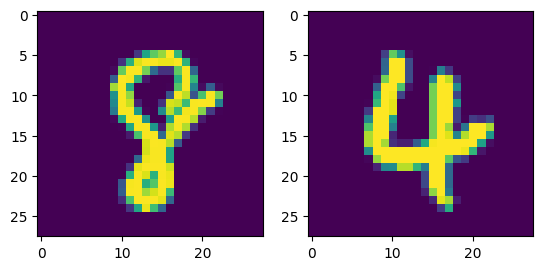

In [28]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt
index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [29]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),
axis = 0)

Y_train = convert_labels(train_labels, 10)

(785, 5000)
(10, 5000)


<Figure size 640x480 with 0 Axes>

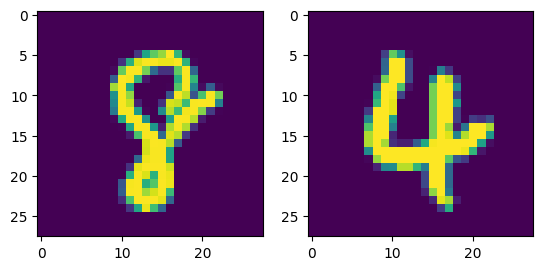

In [30]:
print(X_train.shape)
print(Y_train.shape)
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [31]:
theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))

epoch 0 - cost 0.027443344931256546
epoch 1 - cost 0.017302500778483578
epoch 2 - cost 0.012975715220082196
epoch 3 - cost 0.008650476813388139
epoch 4 - cost 0.007929603745605796
epoch 5 - cost 0.012975715220082196
epoch 6 - cost 0.0036054581913176945
epoch 7 - cost 0.0036130276495739927
epoch 8 - cost 0.0028834922711293938
epoch 9 - cost 0.005046111474476423
epoch 10 - cost 0.0021626192033470507
epoch 11 - cost 0.0014417461355647082
epoch 12 - cost 0.0014417461355647082
epoch 13 - cost 0.0014417461355647082
epoch 14 - cost 1.9053659964405505e-05
epoch 15 - cost 2.2204460492503132e-17
epoch 16 - cost 2.2204460492503132e-17
epoch 17 - cost 2.2204460492503132e-17
epoch 18 - cost 2.2204460492503132e-17
epoch 19 - cost 2.2204460492503132e-17
training success:  (785, 10) 500


In [32]:
from sklearn.metrics import accuracy_score
print('accuracy training data: ', accuracy_score(train_labels, pred(opt_theta, X_train)))

# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T), axis = 0)

print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels, pred(opt_theta, X_test)))

accuracy training data:  0.9414
(785, 10000)
accuracy testing data:  0.8679


In [33]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
x_train_1 = pca.fit_transform(train_images)
x_test_1 = pca.fit_transform(test_images)

In [34]:
model = LogisticRegression()
model.fit(x_train_1, train_labels)
y_pred = model.predict(x_test_1)
print(accuracy_score(test_labels, y_pred))
print(y_pred)
print(pred(opt_theta, X_test))

0.4524
[8 0 9 ... 8 8 0]
[0 0 7 ... 2 3 0]
